# Interpolation

numpy and scipy

In [1]:
import numpy as np
from scipy import optimize, stats
import matplotlib.pyplot as plt

### Linear fit numpy.polyfit

Fit a first-order polynomial with NumPy. Returns a simple model object that can be used.

#### 1) Synthesize a dataset

Text(0.5, 0, 'y_data')

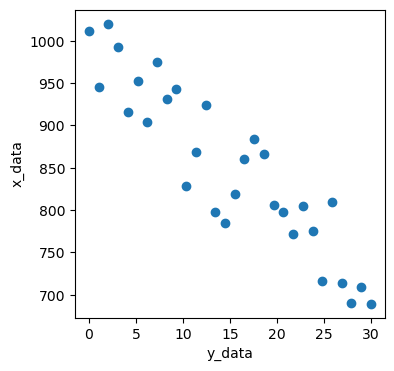

In [2]:
# define a linear function
def linfunc(m,x,c):
    return m * x + c

# generate some x data
x_data = np.linspace(0, 30, 30)

# use the function to generate the y data
y_data = linfunc(-10, x_data, 1000)

# use a random number generator to generate some noise
random_numgen = np.random.default_rng()
noise_y = 50 * random_numgen.normal(size=x_data.size)

# add noise to the y data
data_y = y_data + noise_y

# plot the resulting x, y data
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.scatter(x_data, data_y, label='data')
ax.set_ylabel('x_data')
ax.set_xlabel('y_data')

#### 2) Fit first-order polynomial to data using NumPy

https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

In [3]:
# fit model
model = np.poly1d(np.polyfit(
    x_data,
    y_data,
    1 # first order polynomial, you could do other orders
    ))

print('Correlation equation ', model)

# Note that you can index values from the model object

correlation_intersect = round(model[0],0)
correlation_slope = round(model[1],0)

Correlation equation   
-10 x + 1000


#### 3) Use model to find y for the given x

In [4]:
y_modelled = model(x_data)

print(y_modelled)

[1000.          989.65517241  979.31034483  968.96551724  958.62068966
  948.27586207  937.93103448  927.5862069   917.24137931  906.89655172
  896.55172414  886.20689655  875.86206897  865.51724138  855.17241379
  844.82758621  834.48275862  824.13793103  813.79310345  803.44827586
  793.10344828  782.75862069  772.4137931   762.06896552  751.72413793
  741.37931034  731.03448276  720.68965517  710.34482759  700.        ]


#### 4) Plot modelled y and data together, with equation

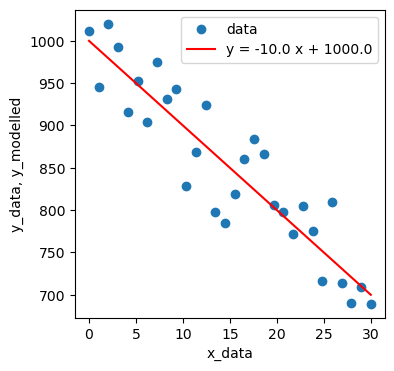

In [5]:
# plot the resulting x, y data
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.scatter(x_data, data_y, label='data')
ax.plot(
    x_data, 
    y_modelled, 
    'r-',
    # recall we used indexing above to assign parts of the model to variables
    label= f'y = {correlation_slope} x + {correlation_intersect}'
    )
ax.set_ylabel('y_data, y_modelled')
ax.set_xlabel('x_data')
ax.legend();

### Linear fit with scipy.stats

Will do the fit and information about the goodness of fit. 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

#### 1) Using the same data as above, generate a linear model fit

In [6]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)

print(slope, intercept, r_value)

-10.0 999.9999999999998 -1.0


#### 2) Determine y for a given x

In [7]:
y_modelled_stats = []
for x in x_data:
    y = slope * x + intercept
    y_modelled_stats.append(y)

#### 3) Plot data and modelled fit together

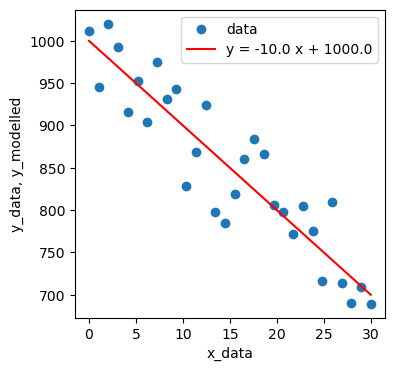

In [8]:
# plot the resulting x, y data
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.scatter(x_data, data_y, label='data')
ax.plot(
    x_data, 
    y_modelled_stats, 
    'r-',
    # recall we used indexing above to assign parts of the model to variables
    label= f'y = {round(slope,0)} x + {round(intercept,0)}'
    )
ax.set_ylabel('y_data, y_modelled')
ax.set_xlabel('x_data')
ax.legend();

## Non-linear problems

If you know the function, then you can use a non-linear least squares to fit a function to the data. 

scipy.optimize.curve_fit(f, xdata, ydata, sigma=None, p0=None, absolute_sigma=True, bounds=(- inf, inf), check_finite=True, jac=None, method=None)

Helpful tutorial that this method is based on: https://pythonguides.com/python-scipy-exponential/


#### Example: Exponential decline

$y=a e^{-b x} + c$

- c1 = mass rate at time zero (must be zero)
- c2 = is decline rate in mass rate per year
- s = shift on the x axis

#### 1) Define the function

We will be using this + random noise to generate data. Then later we will use the function + scipy.optimize to find a fit. 

In [9]:
def expfunc(x, a, b, c):
    return a * np.exp(-b * x) + c

#### 2) Synthesize some data

Text(0.5, 0, 'Time (decimal year)')

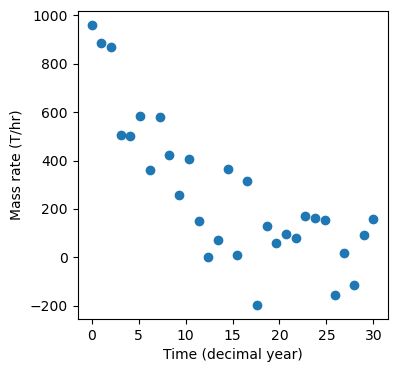

In [10]:
# generate some x data
x_data = np.linspace(0, 30, 30)

# use the exponential function to generate the y data
y_data = expfunc(x_data, 1000, 0.15, 1)

# use a random number generator to generate some noise
random_numgen = np.random.default_rng()
noise_y = 150 * random_numgen.normal(size=x_data.size)

# add noise to the y data
data_y = y_data + noise_y

# plot the resulting x, y data
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.scatter(x_data, data_y, label='data')
ax.set_ylabel('Mass rate (T/hr)')
ax.set_xlabel('Time (decimal year)')

#### 3) Use scipy.optimize to fit the function to the data 

In [11]:
p_opt, p_cov = optimize.curve_fit(expfunc, x_data, data_y)

C:\Users\Irene\AppData\Local\Temp\ipykernel_24356\230124000.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


#### 4) Find y for a given x using the fitted function

In [12]:
y_modelled_opti = expfunc(x_data, *p_opt)

#### 5) Plot data and modelled fit together

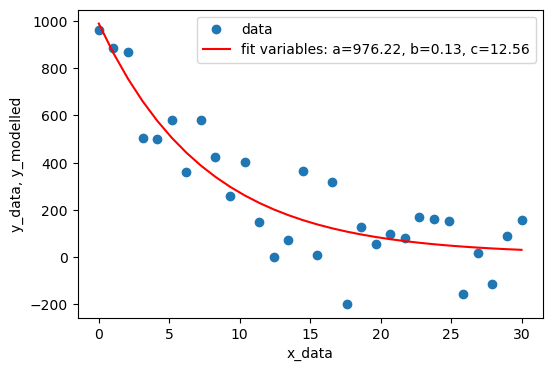

In [14]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.scatter(x_data, data_y, label='data')
ax.plot(
    x_data, y_modelled_opti,
    'r-',
    label=f'fit variables: a={round(p_opt[0],2)}, b={round(p_opt[1],2)}, c={round(p_opt[2],2)}'
    )
ax.legend()
ax.set_ylabel('y_data, y_modelled')
ax.set_xlabel('x_data');